In [1]:
import os
import datetime as dt

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

In [2]:
DATA_SET = "dataset.csv"

In [3]:
def load_dataset(date, filename=DATA_SET):
    """
    Load training data from the one of the data/date folders.

    :parameter date (string): The date folder name.  Ex: "2020-02-05"
    :parameter filename (string): The csv filename.
    :returns a pandas dataframe.
    """

    basepath = os.path.abspath('')
    filepath = os.path.abspath(os.path.join(basepath, "..", "..")) + "/data/" + date + "/" + filename
    return pd.read_csv(filepath)

def calcGrowthRate(df, groupBy, growthCol='temp', newColName='temp'):
    """
    Receives a pandas dataframe, column to group by, a column to calculate the growth rate, and a new column name.
    Pandas dataframe must have a date column of type DateTime.  Generates a new column that calculates day over day
    growth rate.
    
    :parameter df (Pandas DataFrame): The dataframe to mutate.
    :parameter groupBy (str): The column name to group results by
    :parameter growthCol (str): The column name for which we 
    :parameter newColName (str): The new column name
    :returns None.
    """
    return df.groupBy.unique()

## Load Dataset

In [9]:
data = load_dataset("2020-04-05")
data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,05/04/2020,5,4,2020,35,1,Afghanistan,AF,AFG,37172386.0
1,04/04/2020,4,4,2020,0,0,Afghanistan,AF,AFG,37172386.0
2,03/04/2020,3,4,2020,43,0,Afghanistan,AF,AFG,37172386.0
3,02/04/2020,2,4,2020,26,0,Afghanistan,AF,AFG,37172386.0
4,01/04/2020,1,4,2020,25,0,Afghanistan,AF,AFG,37172386.0


## Data Preparation

In [12]:
# Convert dateRep field to a DateType object
#data['dateRep'] = data['dateRep'].apply(lambda x: dt.datetime.strptime(x, '%d/%m/%Y'))
print(type(data['dateRep']))
pd.to_datetime(data['dateRep'], infer_datetime_format=True)

data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,05/04/2020,5,4,2020,35,1,Afghanistan,AF,AFG,37172386.0
1,04/04/2020,4,4,2020,0,0,Afghanistan,AF,AFG,37172386.0
2,03/04/2020,3,4,2020,43,0,Afghanistan,AF,AFG,37172386.0
3,02/04/2020,2,4,2020,26,0,Afghanistan,AF,AFG,37172386.0
4,01/04/2020,1,4,2020,25,0,Afghanistan,AF,AFG,37172386.0


In [6]:
# Drop unnecessary fields
data.drop(['day', 'month', 'year'], axis=1, inplace=True)

In [8]:
# Rename date column
data.rename(columns={'dateRep': 'date'})

,date,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,2020-04-05,35,1,Afghanistan,AF,AFG,37172386.0
1,2020-04-04,0,0,Afghanistan,AF,AFG,37172386.0
2,2020-04-03,43,0,Afghanistan,AF,AFG,37172386.0
3,2020-04-02,26,0,Afghanistan,AF,AFG,37172386.0
4,2020-04-01,25,0,Afghanistan,AF,AFG,37172386.0
...,...,...,...,...,...,...,...
8900,2020-03-25,0,0,Zimbabwe,ZW,ZWE,14439018.0
8901,2020-03-24,0,1,Zimbabwe,ZW,ZWE,14439018.0
8902,2020-03-23,0,0,Zimbabwe,ZW,ZWE,14439018.0
8903,2020-03-22,1,0,Zimbabwe,ZW,ZWE,14439018.0


In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8905 entries, 0 to 8904
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   dateRep                  8905 non-null   datetime64[ns]
 1   cases                    8905 non-null   int64         
 2   deaths                   8905 non-null   int64         
 3   countriesAndTerritories  8905 non-null   object        
 4   geoId                    8883 non-null   object        
 5   countryterritoryCode     8824 non-null   object        
 6   popData2018              8873 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 487.1+ KB


In [134]:
data['countriesAndTerritories'].value_counts()

South_Korea                          97
Japan                                97
Australia                            97
Czech_Republic                       97
Netherlands                          97
                                     ..
Sierra_Leone                          5
Bonaire, Saint Eustatius and Saba     4
Malawi                                3
Falkland_Islands_(Malvinas)           2
Saint_Barthelemy                      1
Name: countriesAndTerritories, Length: 204, dtype: int64

In [135]:
data['geoId'].value_counts()

BE     97
CH     97
IS     97
NL     97
AT     97
       ..
BI      5
BQ      4
MW      3
FK      2
BLM     1
Name: geoId, Length: 203, dtype: int64

In [136]:
data.describe()

,cases,deaths,popData2018
count,8905.000000,8905.000000,8.873000e+03
mean,131.909264,7.231892,6.549505e+07
std,1041.737090,62.844102,2.037894e+08
min,-9.000000,0.000000,1.000000e+03
25%,0.000000,0.000000,3.731000e+06
50%,0.000000,0.000000,1.062570e+07
75%,10.000000,0.000000,4.449450e+07
max,34272.000000,2004.000000,1.392730e+09


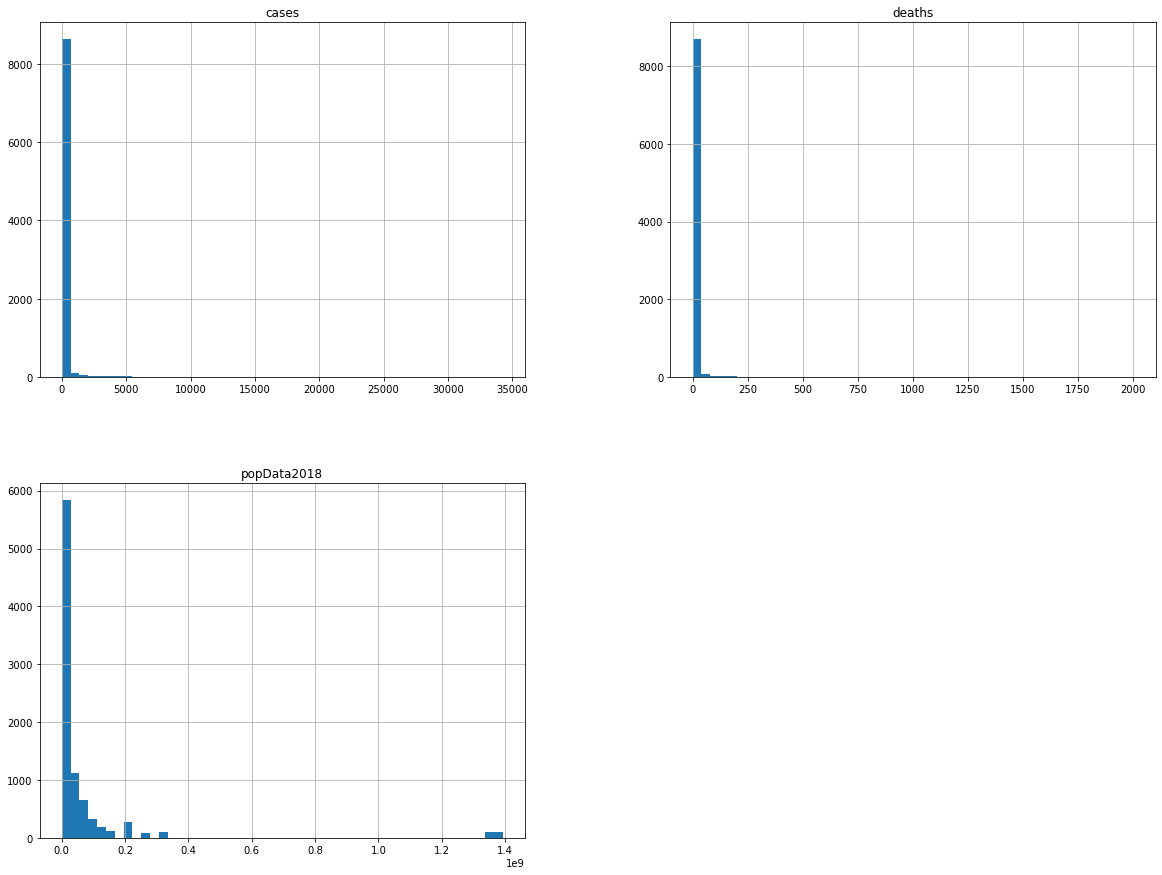

In [137]:
data.hist(bins=50, figsize=(20,15))
plt.savefig('temp__Histogram', format='svg')


## Looking for Correlations

In [151]:
corr_matrix = data.corr()
corr_matrix['deaths'].sort_values(ascending=False)
print('hello')

hello


In [186]:
#data.head()
#len(data.loc[('date' == 50) & (data.geoId == 'AF'), ].index)

data.loc[(data.cases == 35) & (data.geoId == 'AF'), 'deathGrowthRate'] = np.inf
data.loc[(data.cases == 35) & (data.geoId == 'AF'), ]
#data.loc[(data.cases == 35) & (data.geoId == 'AF'),]
#print(int(test))

,dateRep,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,caseGrowthRate,deathGrowthRate
0,2020-04-05,35,1,Afghanistan,AF,AFG,37172386.0,0,inf


In [191]:
# Test my growth function
data['caseGrowthRate'] = 0
data['deathGrowthRate'] = 0
for row in data.iterrows():
    dateToday = row[1][0]
    dateTomorrow = dateToday + dt.timedelta(days=1)
    cases = row[1][1]
    deaths = row[1][2]
    geoId = row[1][4]    
    if len(data.loc[(data.dateRep == dateTomorrow) & (data.geoId == geoId),].index) > 0: # is there data for tomorrow?
        tomDeaths = int(data.loc[(data.dateRep == dateTomorrow) & (data.geoId == geoId),'deaths'])
        tomCases = int(data.loc[(data.dateRep == dateTomorrow) & (data.geoId == geoId),'cases'])
        if deaths == 0:
            data.loc[(data.dateRep == dateTomorrow) & (data.geoId == geoId), 'deathGrowthRate'] = np.inf
        else:
            data.loc[(data.dateRep == dateTomorrow) & (data.geoId == geoId), 'deathGrowthRate'] = tomDeaths / deaths
        if cases == 0:
            data.loc[(data.dateRep == dateTomorrow) & (data.geoId == geoId), 'caseGrowthRate'] = np.inf
        else:
            data.loc[(data.dateRep == dateTomorrow) & (data.geoId == geoId), 'caseGrowthRate'] = tomCases / cases
    
data.head()    
print('test')


#datetime1= dt.datetime(2016,4,30)
#datetime2 = datetime1 - dt.timedelta(days=1)
#datetime2

test


## Experimenting with Attribute Combinations

In [19]:
data['deathsPerMillionPop'] = data['deaths'] / data['popData2018'] / 1000000
data['casesPerMillionPop'] = data['cases'] / data['popData2018'] / 1000000
data['dailyCaseGrowthRate'] = data['cases'] / data['popData2018'] / 1000000

In [190]:
data.head(50)

,dateRep,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,caseGrowthRate,deathGrowthRate
0,2020-04-05,35,1,Afghanistan,AF,AFG,37172386.0,inf,inf
1,2020-04-04,0,0,Afghanistan,AF,AFG,37172386.0,0.000000,inf
2,2020-04-03,43,0,Afghanistan,AF,AFG,37172386.0,1.653846,inf
3,2020-04-02,26,0,Afghanistan,AF,AFG,37172386.0,1.040000,inf
4,2020-04-01,25,0,Afghanistan,AF,AFG,37172386.0,0.925926,inf
5,2020-03-31,27,0,Afghanistan,AF,AFG,37172386.0,3.375000,0.0
6,2020-03-30,8,1,Afghanistan,AF,AFG,37172386.0,0.533333,1.0
7,2020-03-29,15,1,Afghanistan,AF,AFG,37172386.0,0.937500,1.0
8,2020-03-28,16,1,Afghanistan,AF,AFG,37172386.0,inf,inf
9,2020-03-27,0,0,Afghanistan,AF,AFG,37172386.0,0.000000,inf
